Applied Practice for Chapter 3

In [24]:
#package import
import pandas as pd  
import numpy as np  
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#load data
data=pd.read_csv('G:/Code Repo/Data Science/ISLR Learning/Data/Auto.csv')
data=pd.DataFrame(data)
display(data.head(3))
data.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [3]:
#find the non-numeric values
q1=data[['horsepower','mpg']]
q1=q1[pd.to_numeric(q1['horsepower'], errors='coerce').isnull()==False]
q1=q1[pd.to_numeric(q1['mpg'], errors='coerce').isnull()==False]
q1['mpg']=q1['mpg'].astype(np.float)
q1['horsepower']=q1['horsepower'].astype(np.float)
horsepower=np.array(q1['horsepower']).reshape(-1,1).astype(np.float)
mpg=np.array(q1['mpg']).reshape(-1,1).astype(int)

In [4]:
#predict by OLS 
#need to add constant into X
horsepower_c = sm.add_constant(horsepower)
est=sm.OLS(mpg,horsepower_c)
est_fit=est.fit()
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     603.6
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           3.27e-81
Time:                        19:23:55   Log-Likelihood:                -1174.9
No. Observations:                 392   AIC:                             2354.
Df Residuals:                     390   BIC:                             2362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6690      0.711     55.819      0.0

In [8]:
#(2)train model
regressor = LinearRegression()  
regressor.fit(horsepower, mpg)
predictions=regressor.predict(horsepower)

print('Coefficients: \n', regressor.coef_,'Coefficients: \n', regressor.intercept_ )

#predict horsepower
mpg_hat = regressor.predict(np.array([[98]]))
print("Predicted value: ",mpg_hat) 

#Calculate the confidence interval and prediction interval for an estimated value
x_0=98
alpha=0.05
newX=pd.DataFrame(pd.DataFrame(horsepower))
n=len(newX)
t_val=stats.t.ppf(1-alpha/2,n-2)
x_mean=sum(newX)/n
#mse np.dot((mpg-predictions).T,mpg-predictions)
mse=np.dot((mpg-predictions).T,mpg-predictions)/(len(newY)-len(newY.columns))
part1=(x_0-x_mean)**2
part2=np.dot((newX-x_mean).T,newX-x_mean)
#confidence interval
ci_part=t_val*np.sqrt(mse)*np.sqrt(1/n+part1/part2)
print("Confidence Interval: ", mpg_hat-ci_part,mpg_hat+ci_part)
#prediction interval 
pi_part=t_val*np.sqrt(mse)*np.sqrt(1+1/n+part1/part2)
print("Prediction Interval: ",mpg_hat-pi_part,mpg_hat+pi_part)

Coefficients: 
 [[-0.15684809]] Coefficients: 
 [39.6689876]
Predicted value:  [[24.2978744]]


NameError: name 'newY' is not defined

#### Answer 
##### Exercise 8
Question (a) 
<br>i. Yes, there is a relationship between the predictor and the response
<br>ii. The relation ship between the prdictor and the respnse is strong, with a p-value less thatn 0.05 and close to 0.
<br>iii. The relationship between predictor and resonse is negative.
<br>iv. The predicted mpg associated with the horsepower of 98 is 24.47. <br>
The confidence interval for predicted value is [23.8, 25.1], the prediction interval invteral is [14.8, 34.1]

In [6]:
#calculate the statistics step by step
#calculate the p-value
#get the estimation of beta-hat
#calculate the standard errors associated with beta-hat
#get the confidence interval of beta-hat: [beta_hat-2*se(beta_hat),beta_hat+2*se(beta_hat)]
#hypothesis testng on the coefficients H0: there is no relationship between X and Y, which is beta=0
#t-statistics: beta_hat/se(beta_hat), this measures the number of standard deviations that beta_hat is away from 0. 
#when sample size is greater than 30, the t-distribution is similar like bell shape-noral distribution.
#the p-value, the probability of obseraving any number equal to 't' or larger.
#a smal p-value --- reject the null hypothesis
'''
params=np.append(regressor.intercept_,regressor.coef_)
predictions=regressor.predict(horsepower)

newX=pd.DataFrame({"Constant":np.ones(len(horsepower))}).join(pd.DataFrame(horsepower))
newX[newX.columns[1]]=newX[newX.columns[1]].astype(int)
mse=(sum((mpg-predictions)**2))/(len(newX)-len(newX.columns))
#(len(newX)-len(newX.columns)) is a 1-D array
var_b=mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b=np.sqrt(var_b)
ts_b=params/sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)
'''

'\nparams=np.append(regressor.intercept_,regressor.coef_)\npredictions=regressor.predict(horsepower)\n\nnewX=pd.DataFrame({"Constant":np.ones(len(horsepower))}).join(pd.DataFrame(horsepower))\nnewX[newX.columns[1]]=newX[newX.columns[1]].astype(int)\nmse=(sum((mpg-predictions)**2))/(len(newX)-len(newX.columns))\n#(len(newX)-len(newX.columns)) is a 1-D array\nvar_b=mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())\nsd_b=np.sqrt(var_b)\nts_b=params/sd_b\np_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]\nsd_b = np.round(sd_b,3)\nts_b = np.round(ts_b,3)\np_values = np.round(p_values,3)\nmyDF3 = pd.DataFrame()\nmyDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]\nprint(myDF3)\n'

Question (b), the plot of response and predictor & least squares regression


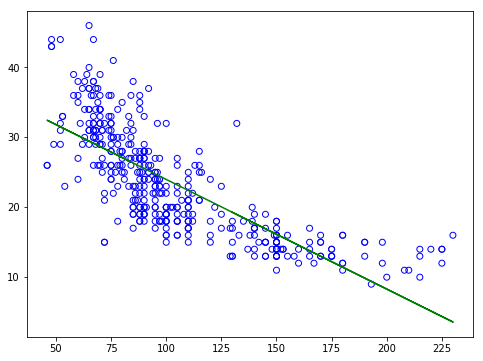

In [9]:
#
print("Question (b), the plot of response and predictor & least squares regression")
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(horsepower,mpg, facecolors='none', edgecolors='b', label="data")
ax.plot(horsepower, predictions, 'green', label="OLS")

Question (c), the least squares regression fit
Comment: The residual plot is bot evenly spread around 0, which means the residual of the model is not follow the normal distribution. The relation shape between predictor and respnse is not linear.


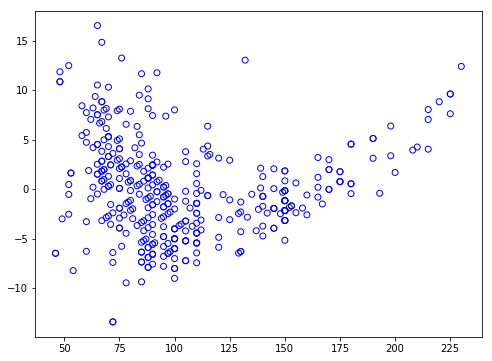

In [10]:
print("Question (c), the least squares regression fit")
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(horsepower,mpg-predictions, facecolors='none', edgecolors='b', label="data")
print("Comment: The residual plot is bot evenly spread around 0, which means the residual of the model is not follow the normal distribution. The relation shape between predictor and respnse is not linear.")
#redisual, studentized residual and leverages.

##### Exercise 9
Question (a) see below chart 1
<br>Question (b) see below chart 2
<br>iii. The relationship between predictor and resonse is negative.
<br>iv. The predicted mpg associated with the horsepower of 98 is 24.47. <br>
The confidence interval for predicted value is [23.8, 25.1], the prediction interval invteral is [14.8, 34.1]

Chart 1


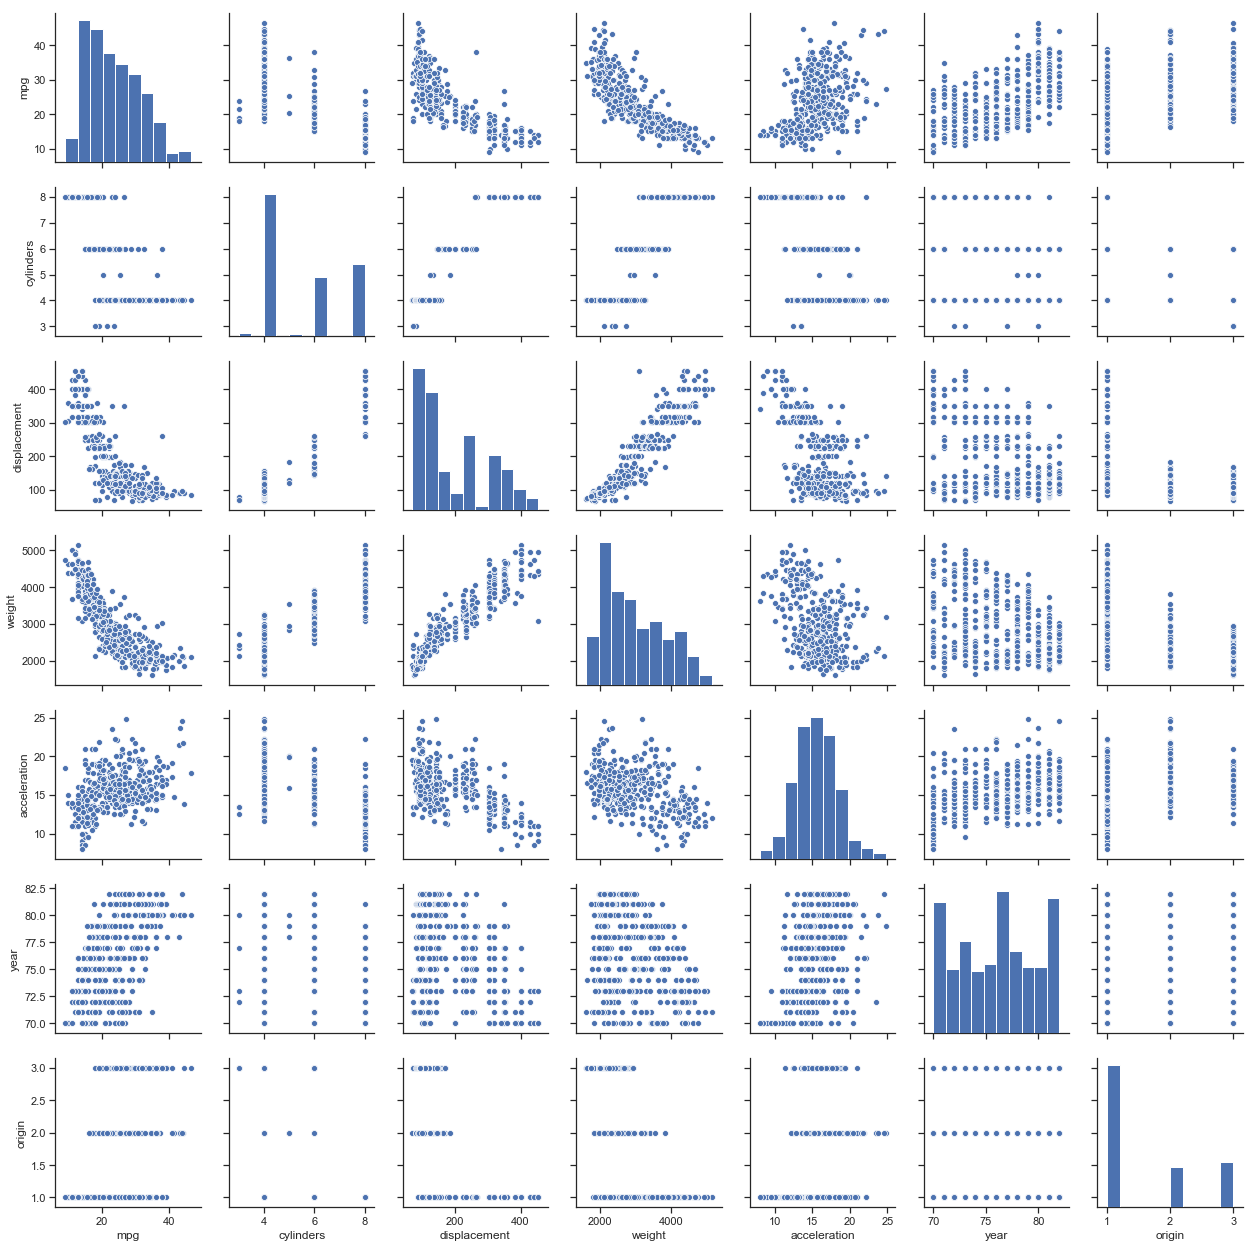

In [11]:
#plot the scatter matrix for all variables
print("Chart 1")
sns.set(style="ticks")
sns.pairplot(data)

### correlation metric
##### Linear - Pearson Correlation
##### Non-linear - 

[Text(0.5, 0, 'mpg'),
 Text(1.5, 0, 'cylinders'),
 Text(2.5, 0, 'displacement'),
 Text(3.5, 0, 'weight'),
 Text(4.5, 0, 'acceleration'),
 Text(5.5, 0, 'year'),
 Text(6.5, 0, 'origin')]

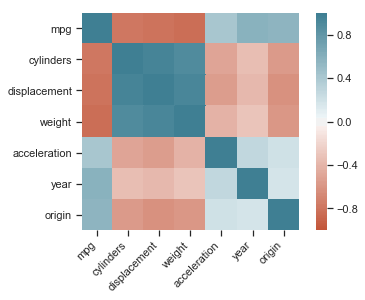

In [39]:
data_num = data.drop(['name'], axis=1)
corr = data_num.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                   horizontalalignment='right')

In [50]:
#drop the na
display(data_num.head(3))
col=list(data_num)
for i in col:
    data_num=data_num[pd.to_numeric(data_num[i], errors='coerce').isnull()==False]
    data_num[i]=data_num[i].astype(np.float)
predictor=data_num.drop(['mpg'], axis=1)
mpg=np.array(data_num['mpg']).reshape(-1,1).astype(np.float)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0


In [41]:
predictor = sm.add_constant(predictor, prepend=False)
m_regressor=sm.OLS(mpg,predictor)
print()
estimate=m_regressor.fit()
print(estimate.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          2.04e-139
Time:                        00:05:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526  

#### Answer
##### (c)
<br> i. There is a relationship between the predictors and the response
<br> ii. The predictors that have a statistically significant relationship to the response are the ones with p-value smaller than 0.05 (here we set significant level as 0.05), which are weight, year, origin, displacement.
<br> iii. The coefficient for the year variable is 0.75 
   

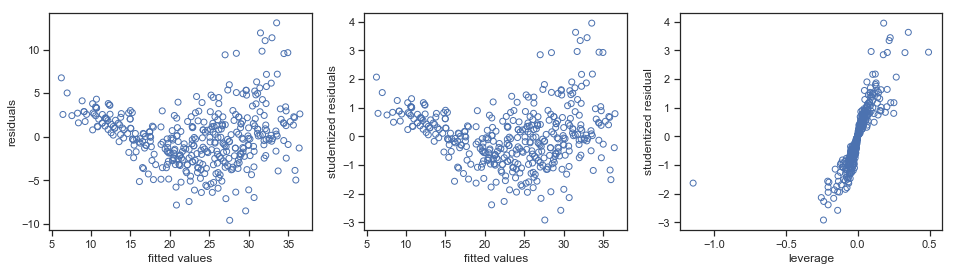

In [42]:
fitted_values = estimate.fittedvalues
residuals=estimate.resid.values
studentized_residuals=OLSInfluence(estimate).resid_studentized_internal
leverages=OLSInfluence(estimate).influence
#plot
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
#residual
ax1.scatter(fitted_values,residuals,facecolors='none',edgecolors='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
#studentized residuals
ax2.scatter(fitted_values,studentized_residuals,facecolors='none',edgecolors='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')
#leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none',edgecolors='b')
ax3.set_xlabel('leverage');
ax3.set_ylabel('studentized residual');

In [51]:
print("(e)fit linear regression models with interaction effects")
predictor_interaction=predictor
predictor_interaction['origin*cylinders']=predictor_interaction['origin']*predictor_interaction['cylinders']
predictor_interaction = sm.add_constant(predictor_interaction, prepend=False)
m_regressor=sm.OLS(mpg,predictor_interaction)
print()
estimate=m_regressor.fit()
print(estimate.summary())

(e)fit linear regression models with interaction effects

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     220.4
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          3.20e-138
Time:                        00:08:11   Log-Likelihood:                -1023.4
No. Observations:                 392   AIC:                             2065.
Df Residuals:                     383   BIC:                             2101.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

(e) The interaction of origin and cylinders is not significant with a p-value great than 0.05

In [59]:
print("(f) try different transformation of the variables")
predictor_interaction=data_num.drop(['mpg'], axis=1)
predictor_interaction['sqrt_displacement']=predictor_interaction['displacement']**(1/2)
predictor_interaction=predictor_interaction.drop(['displacement'], axis=1)
predictor_interaction = sm.add_constant(predictor_interaction, prepend=False)
m_regressor=sm.OLS(mpg,predictor_interaction)
print()
estimate=m_regressor.fit()
print(estimate.summary())

(f) try different transformation of the variables

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     247.3
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          4.97e-138
Time:                        00:15:34   Log-Likelihood:                -1026.7
No. Observations:                 392   AIC:                             2069.
Df Residuals:                     384   BIC:                             2101.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------